In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
import numpy as np
import pandas as pd

In [3]:
import os
os.chdir('/content/drive/MyDrive/project')

In [4]:
!pwd

/content/drive/MyDrive/project


####Loading the data from **csv** files

In [5]:
fake_df = pd.read_csv('News _dataset/Fake.csv')
true_df = pd.read_csv('News _dataset/True.csv')
fake_df.head() , true_df.head()

(                                               title  \
 0   Donald Trump Sends Out Embarrassing New Year’...   
 1   Drunk Bragging Trump Staffer Started Russian ...   
 2   Sheriff David Clarke Becomes An Internet Joke...   
 3   Trump Is So Obsessed He Even Has Obama’s Name...   
 4   Pope Francis Just Called Out Donald Trump Dur...   
 
                                                 text subject  \
 0  Donald Trump just couldn t wish all Americans ...    News   
 1  House Intelligence Committee Chairman Devin Nu...    News   
 2  On Friday, it was revealed that former Milwauk...    News   
 3  On Christmas day, Donald Trump announced that ...    News   
 4  Pope Francis used his annual Christmas Day mes...    News   
 
                 date  
 0  December 31, 2017  
 1  December 31, 2017  
 2  December 30, 2017  
 3  December 29, 2017  
 4  December 25, 2017  ,
                                                title  \
 0  As U.S. budget fight looms, Republicans flip t...   
 1  U

In [6]:
fake_df.shape , true_df.shape

((23481, 4), (21417, 4))

In [7]:
fake_df.columns , true_df.columns

(Index(['title', 'text', 'subject', 'date'], dtype='object'),
 Index(['title', 'text', 'subject', 'date'], dtype='object'))

In [8]:
true_df = true_df.sample(fake_df.shape[0], replace=True)
true_df.shape

(23481, 4)

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image

In the below two cells, we are generating a word cloud to visualize the most frequently used words in the "text" column of the fake_df DataFrame and true_df dataFrame. A word cloud is a popular technique in text analysis to visually represent word frequency, where more frequent words appear larger and less frequent words appear smaller. This allows us to quickly identify the most prominent words in the text data.

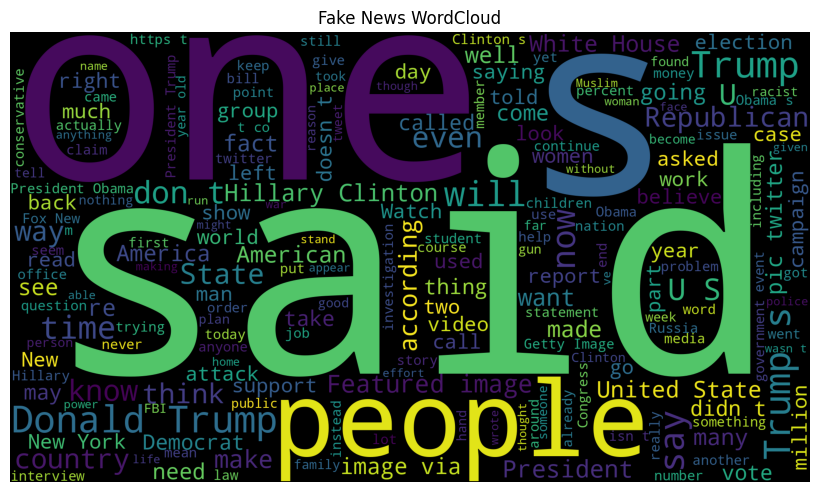

In [ ]:
wordcld_text=" ".join(fake_df["text"].tolist())
wordcloud=WordCloud(background_color='black', width=1920,height=1080).generate(wordcld_text)
fig=plt.figure(figsize=(8,8))
plt.title("Fake News WordCloud")
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

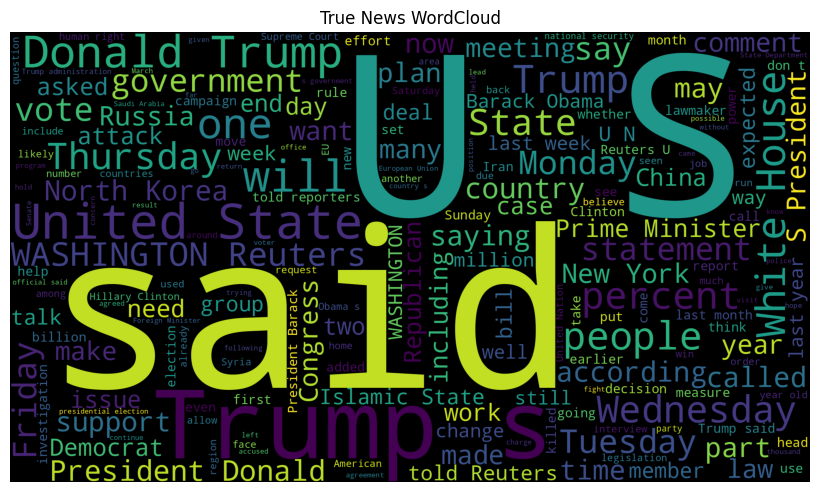

In [ ]:
wordcld_text=" ".join(true_df["text"].tolist())
wordcloud=WordCloud(background_color='black', width=1920,height=1080).generate(wordcld_text)
fig=plt.figure(figsize=(8,8))
plt.title("True News WordCloud")
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

###Analyzing and Visualizing Categorical Data with a Pie Chart
In this cell, we are visualizing the distribution of categories within the "subject" column of the fake_df DataFrame. Categorical data like "subject" is often better understood when we can see the proportion of each unique category, rather than just raw counts.

<Axes: ylabel='count'>

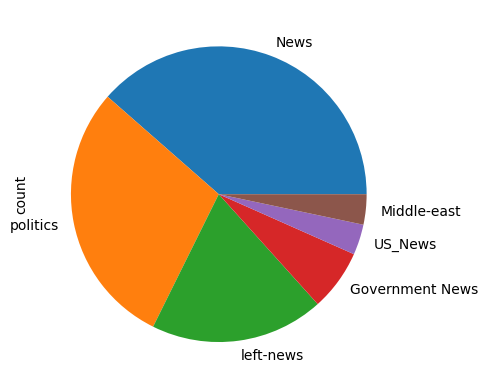

In [ ]:
fake_df["subject"].value_counts().plot(kind='pie')

<Axes: ylabel='count'>

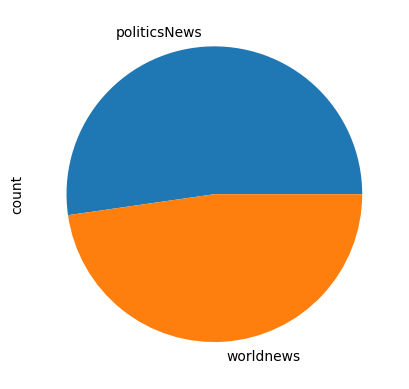

In [ ]:
true_df["subject"].value_counts().plot(kind='pie')

<Axes: xlabel='subject'>

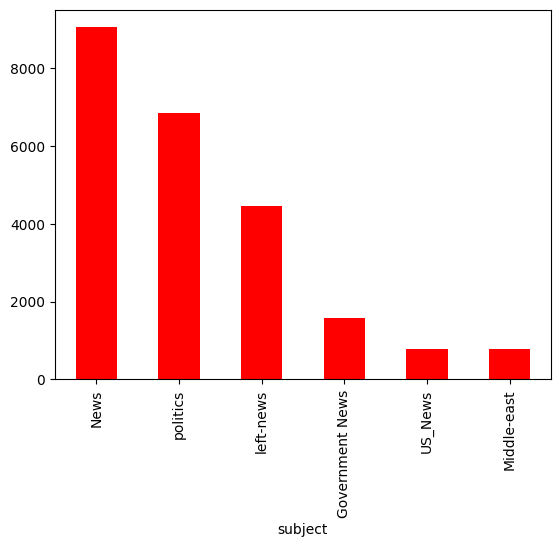

In [ ]:
fake_df["subject"].value_counts().plot(kind='bar' , color='red')

<Axes: xlabel='subject'>

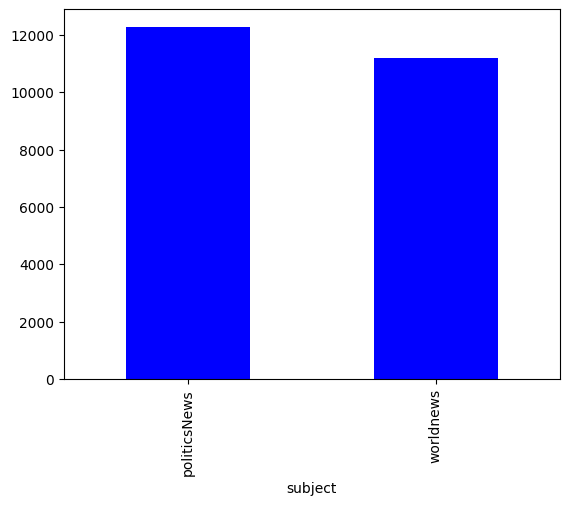

In [ ]:
true_df["subject"].value_counts().plot(kind='bar' , color='blue')

In [9]:
fake_df["label"] = 1
true_df["label"] = 0

##Concatinating the fake_df and true_df DataFrames as a single DataFrame df

In [10]:
df = pd.concat([fake_df , true_df])
df.shape , df["label"].value_counts()

((46962, 5),
 label
 1    23481
 0    23481
 Name: count, dtype: int64)

In [11]:
df.isna().sum()

,0
title,0
text,0
subject,0
date,0
label,0


In [12]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
stemmer = nltk.PorterStemmer()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')
from spacy.lang.en.stop_words import STOP_WORDS
stopwords = list(STOP_WORDS)
len(stopwords)

326

####Data Preprocessing

The preprocessing function refines a sentence for natural language processing by following a series of text-cleaning steps. It begins by converting the text to lowercase, making it case-insensitive and more consistent. Then, it tokenizes the sentence into individual words using nltk.word_tokenize(), which splits the sentence into manageable parts. To remove non-essential words, the function filters out stopwords—common words like "the" and "and" that don’t add significant meaning. Next, each word undergoes [stemming](https://www.geeksforgeeks.org/lemmatization-vs-stemming-a-deep-dive-into-nlps-text-normalization-techniques/), a process that reduces words to their base forms (e.g., “running” becomes “run”), which helps standardize variations of words. After converting the list of stemmed words back into a sentence, the function applies [lemmatization](https://www.geeksforgeeks.org/lemmatization-vs-stemming-a-deep-dive-into-nlps-text-normalization-techniques/) with nlp (likely [spaCy](https://spacy.io/usage/spacy-101) to further reduce words to their dictionary forms, a more advanced approach that considers context and parts of speech. Finally, the preprocessed text, cleaned and reduced to essential information, is returned as a single string ready for NLP analysis.

In [ ]:
def preprocessing(sentence):
  sentence = sentence.lower()
  sentence = nltk.word_tokenize(sentence)
  sentence = [word for word in sentence if word not in stopwords]
  senetence = [stemmer.stem(word) for word in sentence]
  sentence = " ".join(sentence)
  senetence = nlp(sentence)
  sentence = [word.lemma_ for word in senetence]
  sentence = " ".join(sentence)
  return sentence

In [13]:
df['input1'] = df['title']+" "+df['text']

In [14]:

# df['input2'] = df['input1'].apply(preprocessing)

In [15]:
df.sample(1)

,title,text,subject,date,label,input1
6933,"Clinton Campaign Has Been Collecting Dirt, Re...",Even though not all the states in the Democrat...,News,"April 13, 2016",1,"Clinton Campaign Has Been Collecting Dirt, Re..."


In [15]:
data_text = df["input1"]
data_label = df["label"]

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df['input1'], df['label'], test_size=0.2, random_state=42, stratify=df['label'])
x_train.shape, y_train.value_counts()

((37569,),
 label
 1    18785
 0    18784
 Name: count, dtype: int64)

In [18]:
x_train.head()

,input1
3852,FBI chief sought more funds for Russia probe d...
23023,Trump Executive Order on Ethics Commitments Ba...
14946,German police hunt former RAF guerrillas for s...
15954,Russia not currently planning actions against ...
23025,SUNDAY SCREENING: Counter Intelligence – ‘The ...


In [19]:
# !pip install tensorflow_text
x_test.shape , y_test.shape

((9393,), (9393,))

In [20]:
!pip install transformers

In [21]:
from transformers import AutoTokenizer
from transformers import BertTokenizer, TFBertModel

Loading a pretrained **BERT tokenizer** that converts text into tokens compatible with BERT's input format and a re-trained **BERT model** (without case sensitivity) for generating embeddings or performing downstream tasks like classification

In [22]:
bert_tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
bert_model_imp = TFBertModel.from_pretrained('bert-base-uncased')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [23]:
x_train.shape

(37569,)

In [24]:
l = list(x_train)

In [25]:
text = l[0]

In [26]:
len(l)

37569

The tokenize function processes a list of text inputs X using the BERT tokenizer. It converts each text entry into token IDs that BERT can understand, adding special tokens (e.g., [CLS], [SEP]), and ensures that the tokenized sequences have a maximum length of 100 through truncation and padding. The function returns the tokenized outputs as TensorFlow tensors, including attention masks to indicate which tokens are padding and which are part of the original input, while excluding token type IDs.

In [27]:
def tokenize(X):

    X = bert_tokenizer(
        text = list(X),
        add_special_tokens = True,
        max_length = 100,
        truncation = True,
        padding = 'max_length',
        return_tensors = 'tf',
        return_token_type_ids = False,
        return_attention_mask = True,
        verbose = True
        )
    return X

In [28]:
X_train_token = tokenize(x_train)
X_test_token = tokenize(x_test)

In [29]:
text = x_train[0]
tokenize(text)

{'input_ids': <tf.Tensor: shape=(2973, 100), dtype=int32, numpy=
array([[ 101,  102,    0, ...,    0,    0,    0],
       [ 101, 1040,  102, ...,    0,    0,    0],
       [ 101, 1051,  102, ...,    0,    0,    0],
       ...,
       [ 101, 1041,  102, ...,    0,    0,    0],
       [ 101, 1055,  102, ...,    0,    0,    0],
       [ 101, 1012,  102, ...,    0,    0,    0]], dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(2973, 100), dtype=int32, numpy=
array([[1, 1, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]], dtype=int32)>}

In [30]:
len(X_train_token["input_ids"])

37569

In [31]:
len(X_test_token["input_ids"])

9393

###Building the Model

In [32]:
from tensorflow.keras.layers import Layer
from tensorflow.keras.utils import register_keras_serializable
from transformers import TFBertModel

@register_keras_serializable()
class BertLayer(Layer):
    def __init__(self, model_name="bert-base-uncased", **kwargs):
        super(BertLayer, self).__init__(**kwargs)
        self.model_name = model_name
        self.bert = TFBertModel.from_pretrained(model_name)

    def call(self, inputs):
        return self.bert(inputs)[1]

    def get_config(self):
        config = super(BertLayer, self).get_config()
        config.update({
            "model_name": self.model_name,
        })
        return config

    @classmethod
    def from_config(cls, config):
        model_name = config.pop("model_name")
        return cls(model_name=model_name, **config)

In [33]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout, Layer
from tensorflow.keras.models import Model

from tensorflow.keras.layers import Layer
from tensorflow import keras
from tensorflow.keras.utils import register_keras_serializable


def create_model(maxlen=100):
    input_ids = Input(shape=(maxlen,), dtype=tf.int32, name="input_ids")
    attention_mask = Input(shape=(maxlen,), dtype=tf.int32, name="attention_mask")

    bert_layer = BertLayer()
    pooled_output = bert_layer({'input_ids': input_ids, 'attention_mask': attention_mask})

    x = Dropout(0.5)(pooled_output)
    x = Dense(64, activation="tanh")(x)
    x = Dropout(0.2)(x)
    output = Dense(1, activation="sigmoid")(x)

    model = Model(inputs=[input_ids, attention_mask], outputs=output)
    return model

# Create the model
model_imp = create_model()

# Display the model summary
model_imp.summary()

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ attention_mask            │ (None, 100)            │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_ids (InputLayer)    │ (None, 100)            │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bert_layer (BertLayer)    │ (None, 768)            │              0 │ attention_mask[0][0],  │
│                           │                        │                │ input_ids[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout (Dropout)         │ (None, 768)            │              0 │ bert_layer[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 64)             │         49,216 │ dropout[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_1 (Dropout)       │ (None, 64)             │              0 │ dense[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 1)              │             65 │ dropout_1[0][0]        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 49,281 (192.50 KB)

 Trainable params: 49,281 (192.50 KB)

 Non-trainable params: 0 (0.00 B)

In [34]:
from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=1e-05, epsilon=1e-08, decay=0.01,clipnorm=1.0)
model_imp.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [35]:
history = model_imp.fit(
    x={
        'input_ids': X_train_token['input_ids'],
        'attention_mask': X_train_token['attention_mask']
    },
    y=y_train,
    epochs=2,
    batch_size=32,
    validation_data=(
        {
            'input_ids': X_test_token['input_ids'],
            'attention_mask': X_test_token['attention_mask']
        },
        y_test
    )
)

Epoch 1/2
1175/1175 ━━━━━━━━━━━━━━━━━━━━ 301s 237ms/step - accuracy: 0.5049 - loss: 0.7545 - val_accuracy: 0.6378 - val_loss: 0.6704
Epoch 2/2
1175/1175 ━━━━━━━━━━━━━━━━━━━━ 302s 229ms/step - accuracy: 0.5276 - loss: 0.7269 - val_accuracy: 0.6422 - val_loss: 0.6576


In [36]:
y_pred = model_imp.predict(x = {
    'input_ids': X_test_token['input_ids'],
    'attention_mask': X_test_token['attention_mask']
})
y_pred = np.where(y_pred > 0.5, 1, 0)

294/294 ━━━━━━━━━━━━━━━━━━━━ 61s 186ms/step


In [40]:
y_pred[:20] , y_test[:20]

(array([[1],
        [1],
        [1],
        [1],
        [1],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [1],
        [0],
        [1],
        [0],
        [1]]),
 19685    0
 6066     1
 900      0
 13741    1
 18368    1
 14299    0
 20783    0
 9306     0
 6116     1
 19226    0
 16472    1
 14551    0
 7220     0
 13142    0
 2842     0
 19387    0
 5108     0
 16847    1
 14571    0
 5372     1
 Name: label, dtype: int64)

In [38]:
model_imp.evaluate(x = {
    'input_ids': X_test_token['input_ids'],
    'attention_mask': X_test_token['attention_mask']
}, y = y_test)

294/294 ━━━━━━━━━━━━━━━━━━━━ 47s 160ms/step - accuracy: 0.6487 - loss: 0.6566


[0.6575971245765686, 0.642180323600769]

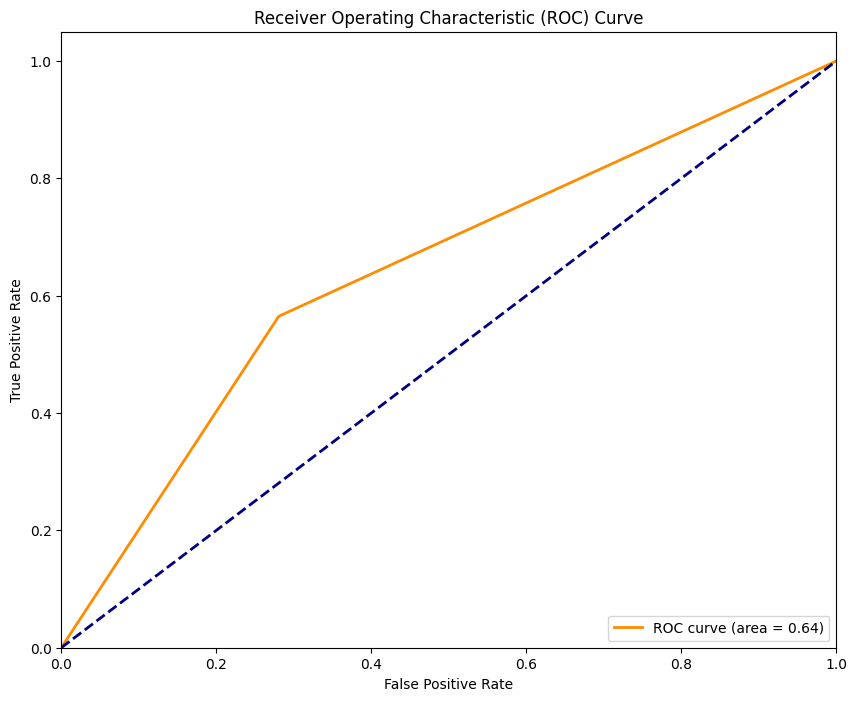

In [39]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred)  # Removed indexing on y_pred_prob
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10,8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [41]:
model_imp.save('model_path.keras')

In [42]:
from transformers import TFBertModel
model1 = tf.keras.models.load_model('model_path.keras', custom_objects={'BertLayer': BertLayer, 'TFBertModel': TFBertModel})


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [43]:
model1.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ attention_mask            │ (None, 100)            │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_ids (InputLayer)    │ (None, 100)            │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bert_layer (BertLayer)    │ (None, 768)            │              0 │ attention_mask[0][0],  │
│                           │                        │                │ input_ids[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout (Dropout)         │ (None, 768)            │              0 │ bert_layer[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 64)             │         49,216 │ dropout[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_1 (Dropout)       │ (None, 64)             │              0 │ dense[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 1)              │             65 │ dropout_1[0][0]        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 147,845 (577.52 KB)

 Trainable params: 49,281 (192.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 98,564 (385.02 KB)

In [44]:
model1.evaluate(x = {
    'input_ids': X_test_token['input_ids'],
    'attention_mask': X_test_token['attention_mask']
}, y = y_test)

294/294 ━━━━━━━━━━━━━━━━━━━━ 69s 200ms/step - accuracy: 0.6487 - loss: 0.6566


[0.6575971245765686, 0.642180323600769]

In [45]:
l = list(x_test)
l[0]

"Eying snap election, Japan's Abe to focus on education, security TOKYO (Reuters) - Pledges to spend on education and child care, stay tough on North Korea and revise the pacifist constitution are likely to be pillars of Japanese Prime Minister Shinzo Abe s campaign in a snap election next month, government sources said on Tuesday. Abe is expected to announce on Monday that he will call a general election on Oct. 22 to take advantage of a rebound in his damaged approval ratings and disarray in the opposition, ruling party and government sources said. The prime minister, whose ratings have recovered from below 30 percent in July, is betting his ruling bloc can at a minimum retain a simple majority in the chamber and at best keep the two-thirds super-majority needed to achieve his long-held goal of revising the constitution to clarify the military s role. A solid victory would boost Abe s chances of a third term as ruling Liberal Democratic Party (LDP) leader in a party election next Sep

In [63]:
text1 = '''Eying snap election, Japan's Abe to focus on education, security TOKYO (Reuters) - Pledges to spend on education and child care, stay tough on North Korea and revise the pacifist constitution are likely to be pillars of Japanese Prime Minister Shinzo Abe s campaign in a snap election next month, government sources said on Tuesday. Abe is expected to announce on Monday that he will call a general election on Oct. 22 to take advantage of a rebound in his damaged approval ratings and disarray in the opposition, ruling party and government sources said. The prime minister, whose ratings have recovered from below 30 percent in July, is betting his ruling bloc can at a minimum retain a simple majority in the chamber and at best keep the two-thirds super-majority needed to achieve his long-held goal of revising the constitution to clarify the military s role. A solid victory would boost Abe s chances of a third term as ruling Liberal Democratic Party (LDP) leader in a party election next September, putting him on track to become Japan s longest-serving premier.  That is his biggest goal,  said veteran independent political analyst Minoru Morita.  Abe s support rose 6.5 points to 50.3 percent in a poll conducted over the weekend by the Sankei newspaper and the Fuji News Network, while backing for the LDP was at 38 percent compared to 6.4 percent for the main opposition Democratic Party. Abe wants to go ahead with a planned rise in the nation s sales tax to 10 percent from 8 percent and use some of the revenue to create a  social security system for all generations , which would invest in education while decreasing the proportion of sales tax revenue used to pay down government debt, the sources said.  Japan s social welfare system is weighted toward spending on the elderly, with people aged 65 and over accounting for a whopping 27.7 percent of the population according to the latest government data.   You can promise anything you want - make a nod toward a more equitable society, empowering women, work-life balance, welfare for all generations,  said Jeffrey Kingston, director of Asian studies at Temple University Japan.  He s got a strategy that is going to win.  Using less tax revenue to pay down debt, however, would make more difficult an already ambitious pledge to balance the budget - excluding debt-servicing and new bond sales - by the year through March 2021. That could in turn raise concerns about less rigid fiscal discipline.  We have to maintain fiscal discipline, regardless,  Finance Minister Taro Aso told reporters when asked about reports of such a shift. Abe has said he will decide on a snap election after he returns from the United States on Friday. The opposition Democrats are struggling not only with single-digit support but also a raft of defections. And while the nascent  Japan First  party, which boasts ties to popular Tokyo Governor Yuriko Koike, could attract votes, it has yet to draft a platform, pick candidates or formally register as a party. That means the LDP and its junior coalition partner, the Komeito, have a shot at retaining their two-thirds majority in the lower house, political analysts said. However, some analysts believe Abe s electoral base could be undermined by voter distaste over suspected cronyism scandals and concerns about creating a political vacuum even as North Korea raises tensions with its nuclear and missile tests.  I don t dismiss the possibility of the voters giving Abe a nasty surprise,  said Gerry Curtis, professor emeritus at Columbia University in New York. '''

In [76]:
text2= '''As U.S. budget fight looms, Republicans flip their fiscal script WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a â€œfiscal conservativeâ€ on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBSâ€™ â€œFace the Nation,â€ drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for non-defense â€œdiscretionaryâ€ spending on programs that support education, scientific research, infrastructure, public health and environmental protection. â€œThe (Trump) administration has already been willing to say: â€˜Weâ€™re going to increase non-defense discretionary spending ... by about 7 percent,â€™â€ Meadows, chairman of the small but influential House Freedom Caucus, said on the program. â€œNow, Democrats are saying thatâ€™s not enough, we need to give the government a pay raise of 10 to 11 percent. For a fiscal conservative, I donâ€™t see where the rationale is. ... Eventually you run out of other peopleâ€™s money,â€ he said. Meadows was among Republicans who voted in late December for their partyâ€™s debt-financed tax overhaul, which is expected to balloon the federal budget deficit and add about $1.5 trillion over 10 years to the $20 trillion national debt. â€œItâ€™s interesting to hear Mark talk about fiscal responsibility,â€ Democratic U.S. Representative Joseph Crowley said on CBS. Crowley said the Republican tax bill would require the  United States to borrow $1.5 trillion, to be paid off by future generations, to finance tax cuts for corporations and the rich. â€œThis is one of the least ... fiscally responsible bills weâ€™ve ever seen passed in the history of the House of Representatives. I think weâ€™re going to be paying for this for many, many years to come,â€ Crowley said. Republicans insist the tax package, the biggest U.S. tax overhaul in more than 30 years,  will boost the economy and job growth. House Speaker Paul Ryan, who also supported the tax bill, recently went further than Meadows, making clear in a radio interview that welfare or â€œentitlement reform,â€ as the party often calls it, would be a top Republican priority in 2018. In Republican parlance, â€œentitlementâ€ programs mean food stamps, housing assistance, Medicare and Medicaid health insurance for the elderly, poor and disabled, as well as other programs created by Washington to assist the needy. Democrats seized on Ryanâ€™s early December remarks, saying they showed Republicans would try to pay for their tax overhaul by seeking spending cuts for social programs. But the goals of House Republicans may have to take a back seat to the Senate, where the votes of some Democrats will be needed to approve a budget and prevent a government shutdown. Democrats will use their leverage in the Senate, which Republicans narrowly control, to defend both discretionary non-defense programs and social spending, while tackling the issue of the â€œDreamers,â€ people brought illegally to the country as children. Trump in September put a March 2018 expiration date on the Deferred Action for Childhood Arrivals, or DACA, program, which protects the young immigrants from deportation and provides them with work permits. The president has said in recent Twitter messages he wants funding for his proposed Mexican border wall and other immigration law changes in exchange for agreeing to help the Dreamers. Representative Debbie Dingell told CBS she did not favor linking that issue to other policy objectives, such as wall funding. â€œWe need to do DACA clean,â€ she said.  On Wednesday, Trump aides will meet with congressional leaders to discuss those issues. That will be followed by a weekend of strategy sessions for Trump and Republican leaders on Jan. 6 and 7, the White House said. Trump was also scheduled to meet on Sunday with Florida Republican Governor Rick Scott, who wants more emergency aid. The House has passed an $81 billion aid package after hurricanes in Florida, Texas and Puerto Rico, and wildfires in California. The package far exceeded the $44 billion requested by the Trump administration. The Senate has not yet voted on the aid. '''

In [77]:
df = pd.DataFrame({'input1': [text1 , text2]})

In [78]:
df.head()

,input1
0,"Eying snap election, Japan's Abe to focus on e..."
1,"As U.S. budget fight looms, Republicans flip t..."


In [79]:
text = tokenize(df['input1'])

In [80]:
text['input_ids']

<tf.Tensor: shape=(2, 100), dtype=int32, numpy=
array([[  101,  1041, 14147, 10245,  2602,  1010,  2900,  1005,  1055,
        14863,  2000,  3579,  2006,  2495,  1010,  3036,  5522,  1006,
        26665,  1007,  1011, 16393,  2015,  2000,  5247,  2006,  2495,
         1998,  2775,  2729,  1010,  2994,  7823,  2006,  2167,  4420,
         1998,  7065,  5562,  1996, 14397, 10128,  2923,  4552,  2024,
         3497,  2000,  2022, 13766,  1997,  2887,  3539,  2704, 12277,
         6844, 14863,  1055,  3049,  1999,  1037, 10245,  2602,  2279,
         3204,  1010,  2231,  4216,  2056,  2006,  9857,  1012, 14863,
         2003,  3517,  2000, 14970,  2006,  6928,  2008,  2002,  2097,
         2655,  1037,  2236,  2602,  2006, 13323,  1012,  2570,  2000,
         2202,  5056,  1997,  1037, 27755,  1999,  2010,  5591,  6226,
          102],
       [  101,  2004,  1057,  1012,  1055,  1012,  5166,  2954,  8840,
        22225,  1010, 10643, 11238,  2037, 10807,  5896,  2899,  1006,
        26665

In [81]:
model_imp.predict(x = {
    'input_ids': text['input_ids'],
    'attention_mask': text['attention_mask']
})

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


array([[0.61292315],
       [0.5589717 ]], dtype=float32)

In [82]:
model1.predict(x = {
    'input_ids': text['input_ids'],
    'attention_mask': text['attention_mask']
})

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


array([[0.61292315],
       [0.5589717 ]], dtype=float32)

In [17]:
!pip install -U "tensorflow-text==2.15.*"
!pip install -U "tf-models-official==2.15.*"

In [18]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text

####Importing the preprocessed layer and Basic Bert model of 12 encoders

The bert_preprocess layer from TensorFlow Hub applies preprocessing to raw text inputs, such as tokenization and padding, to prepare them for BERT. The bert_encoder layer loads a pre-trained BERT model for encoding text, converting the preprocessed input into embeddings (dense vector representations) that capture contextual meanings. Both layers are used together in a Keras model to process and encode text for downstream tasks like classification or sentiment analysis.

In [ ]:
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/3")

In [ ]:
def get_sentence_embeding(sentences):
    preprocessed_text = bert_preprocess(sentences)
    return bert_encoder(preprocessed_text)['pooled_output']

In [ ]:
txt = ["I am hari", "shararth"]
preprocessed = bert_preprocess(txt)
preprocessed.keys()

dict_keys(['input_type_ids', 'input_word_ids', 'input_mask'])

In [ ]:
preprocessed['input_word_ids']

<tf.Tensor: shape=(2, 128), dtype=int32, numpy=
array([[  101,  1045,  2572, 21291,   102,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0, 

In [ ]:
encoded = bert_encoder(preprocessed)
encoded.keys()

dict_keys(['default', 'encoder_outputs', 'sequence_output', 'pooled_output'])

In [ ]:
len(encoded['sequence_output'])

2

###Building the model

In [ ]:
#Model
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)

l = tf.keras.layers.Dropout(0.1, name="dropout")(outputs['pooled_output'])
l = tf.keras.layers.Dense(32, activation='sigmoid', name="inner")(l)
l = tf.keras.layers.Dropout(0.1, name="dropout_inner")(l)
l = tf.keras.layers.Dense(1, activation='sigmoid', name="output")(l)

model = tf.keras.Model(inputs=[text_input], outputs = [l])

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 text (InputLayer)           [(None,)]                    0         []                            
                                                                                                  
 keras_layer (KerasLayer)    {'input_type_ids': (None,    0         ['text[0][0]']                
                             128),                                                                
                              'input_word_ids': (None,                                            
                             128),                                                                
                              'input_mask': (None, 128)                                           
                             }                                                                

In [ ]:
x_train.head()

,input1
6474,"As Trump targets Toyota over Mexico, Nissan fa..."
23023,Trump Executive Order on Ethics Commitments Ba...
21237,"Trial against Guatemalan president's brother, ..."
63,"After ruling, Virginia legislature's majority ..."
23025,SUNDAY SCREENING: Counter Intelligence – ‘The ...


In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
x_train,x_val_train, x_testt,   x_val_test = train_test_split(x_train, y_train, test_size = 0.15, random_state = 43 , stratify = y_train)
x_train.shape, x_val_test.value_counts()

((31933,),
 label
 1    2818
 0    2818
 Name: count, dtype: int64)

In [ ]:
history = model.fit(x_train, x_testt, epochs= 10, batch_size = 64, validation_data = (x_val_train, x_val_test) )

Epoch 1/10
499/499 [==============================] - 482s 945ms/step - loss: 0.3026 - accuracy: 0.8896 - val_loss: 0.2065 - val_accuracy: 0.9219
Epoch 2/10
499/499 [==============================] - 472s 946ms/step - loss: 0.1708 - accuracy: 0.9362 - val_loss: 0.1331 - val_accuracy: 0.9517
Epoch 3/10
499/499 [==============================] - 473s 947ms/step - loss: 0.1503 - accuracy: 0.9433 - val_loss: 0.1139 - val_accuracy: 0.9603
Epoch 4/10
499/499 [==============================] - 471s 944ms/step - loss: 0.1436 - accuracy: 0.9451 - val_loss: 0.1106 - val_accuracy: 0.9595
Epoch 5/10
499/499 [==============================] - 460s 922ms/step - loss: 0.1325 - accuracy: 0.9490 - val_loss: 0.0974 - val_accuracy: 0.9663
Epoch 6/10
499/499 [==============================] - 474s 950ms/step - loss: 0.1303 - accuracy: 0.9508 - val_loss: 0.1058 - val_accuracy: 0.9629
Epoch 7/10
499/499 [==============================] - 474s 950ms/step - loss: 0.1272 - accuracy: 0.9512 - val_loss: 0.0913 -


---

* Plots between the training accuracy and validation accuracy
* Plots between the training loss and validation loss




---



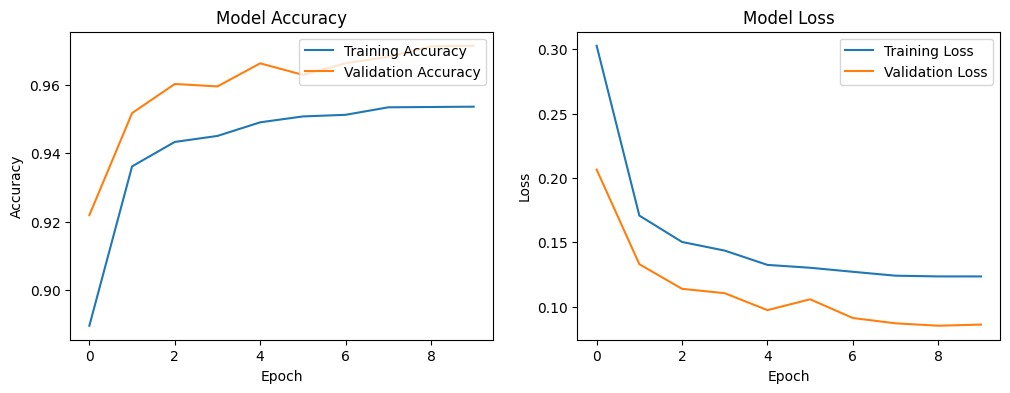

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper right')

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.show()


In [20]:
y_pred = model.predict(x_test)
y_pred = np.where(y_pred > 0.5, 1, 0)

294/294 [==============================] - 116s 381ms/step


In [21]:
len(y_pred)

9393

In [23]:
model.evaluate(x_test, y_test)

294/294 [==============================] - 117s 389ms/step - loss: 0.1611 - accuracy: 0.9420


[0.16113735735416412, 0.9419780969619751]

#ROC-AUC curve of the model at various thresholds

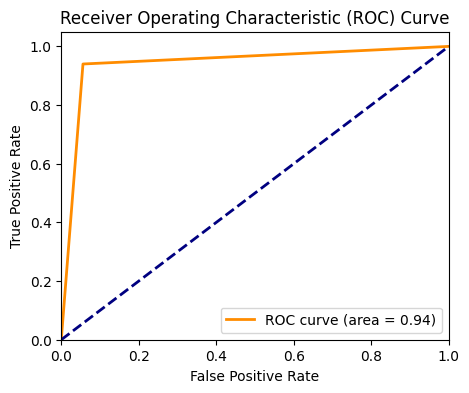

In [26]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(5,4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

##Classificatin Report
The ***classification_report()*** function from sklearn.metrics is used to compute various classification metrics such as precision, recall, f1-score, and support for each class (True or Fake). The report provides a summary of how well the model performed for each class in terms of these metrics. The target_names parameter is used to map the numerical class labels to human-readable names (True and Fake in this case).

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix , classification_report
class_names =['True','Fake']
report = classification_report(y_test, y_pred, target_names=class_names)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

        True       0.97      0.97      0.97      4697
        Fake       0.97      0.97      0.97      4696

    accuracy                           0.97      9393
   macro avg       0.97      0.97      0.97      9393
weighted avg       0.97      0.97      0.97      9393



---
##Confusion Matrix
You may also visualize the ***confusion matrix*** to better understand how the model's predictions compare to the actual labels. The confusion matrix shows the number of true positives, false positives, true negatives, and false negatives, which can help you assess the types of errors made by the model.

-----

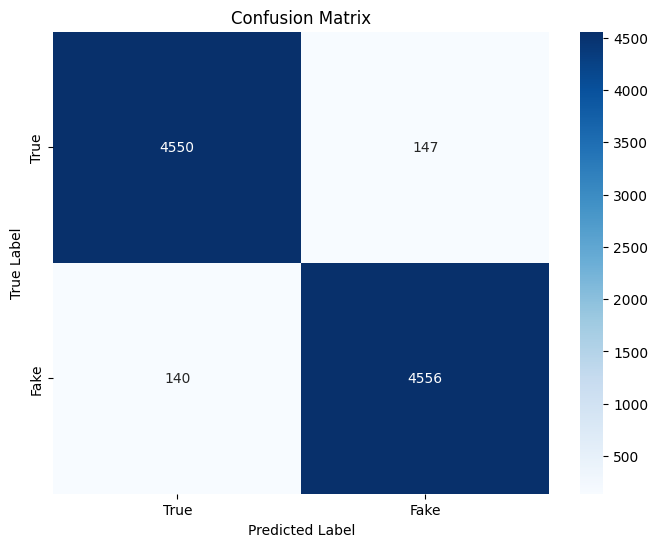

In [ ]:
cm = confusion_matrix(y_test, y_pred)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# import pickle
# with open('model.pkl', 'wb') as f:
#     pickle.dump(model, f)

##Saving the model to our local disk.

In [ ]:
model.save("model_path.h5")

##Loading the model from our local disk

In [19]:
import tensorflow as tf

# Load the model in SavedModel format
model1 = tf.keras.models.load_model("model_path.h5", custom_objects={"KerasLayer" : hub.KerasLayer})

In [ ]:
model1.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 text (InputLayer)           [(None,)]                    0         []                            
                                                                                                  
 keras_layer (KerasLayer)    {'input_word_ids': (None,    0         ['text[0][0]']                
                             128),                                                                
                              'input_mask': (None, 128)                                           
                             , 'input_type_ids': (None,                                           
                              128)}                                                               
                                                                                              

In [ ]:
df['input1'] , df['label']

(0         Donald Trump Sends Out Embarrassing New Year’...
 1         Drunk Bragging Trump Staffer Started Russian ...
 2         Sheriff David Clarke Becomes An Internet Joke...
 3         Trump Is So Obsessed He Even Has Obama’s Name...
 4         Pope Francis Just Called Out Donald Trump Dur...
                                ...                        
 2759     U.S. House may be near deal on stalled Russia ...
 16609    Kenya officials change way of announcing elect...
 10513    Texas governor takes aim at 'caustic' tweeter ...
 19353    Turkish missile deal with Russia reflects stor...
 15848    Geneva process is the only appropriate format ...
 Name: input1, Length: 46962, dtype: object,
 0        1
 1        1
 2        1
 3        1
 4        1
         ..
 2759     0
 16609    0
 10513    0
 19353    0
 15848    0
 Name: label, Length: 46962, dtype: int64)

In [ ]:
l = [' Donald Trump Sends Out Embarrassing New Year’s Eve Message; This is Disturbing ']

In [ ]:
l = [''' Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and  the very dishonest fake news media.  The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year,  President Angry Pants tweeted.  2018 will be a great year for America! As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America!  Donald J. Trump (@realDonaldTrump) December 31, 2017Trump s tweet went down about as welll as you d expect.What kind of president sends a New Year s greeting like this despicable, petty, infantile gibberish? Only Trump! His lack of decency won t even allow him to rise above the gutter long enough to wish the American citizens a happy new year!  Bishop Talbert Swan (@TalbertSwan) December 31, 2017no one likes you  Calvin (@calvinstowell) December 31, 2017Your impeachment would make 2018 a great year for America, but I ll also accept regaining control of Congress.  Miranda Yaver (@mirandayaver) December 31, 2017Do you hear yourself talk? When you have to include that many people that hate you you have to wonder? Why do the they all hate me?  Alan Sandoval (@AlanSandoval13) December 31, 2017Who uses the word Haters in a New Years wish??  Marlene (@marlene399) December 31, 2017You can t just say happy new year?  Koren pollitt (@Korencarpenter) December 31, 2017Here s Trump s New Year s Eve tweet from 2016.Happy New Year to all, including to my many enemies and those who have fought me and lost so badly they just don t know what to do. Love!  Donald J. Trump (@realDonaldTrump) December 31, 2016This is nothing new for Trump. He s been doing this for years.Trump has directed messages to his  enemies  and  haters  for New Year s, Easter, Thanksgiving, and the anniversary of 9/11. pic.twitter.com/4FPAe2KypA  Daniel Dale (@ddale8) December 31, 2017Trump s holiday tweets are clearly not presidential.How long did he work at Hallmark before becoming President?  Steven Goodine (@SGoodine) December 31, 2017He s always been like this . . . the only difference is that in the last few years, his filter has been breaking down.  Roy Schulze (@thbthttt) December 31, 2017Who, apart from a teenager uses the term haters?  Wendy (@WendyWhistles) December 31, 2017he s a fucking 5 year old  Who Knows (@rainyday80) December 31, 2017So, to all the people who voted for this a hole thinking he would change once he got into power, you were wrong! 70-year-old men don t change and now he s a year older.Photo by Andrew Burton/Getty Images.''']

In [ ]:
y = model1.predict(l)

1/1 [==============================] - 1s 795ms/step


In [ ]:
y[0][0]

0.92403805

In [ ]:
import numpy as np
from flask import Flask, request, jsonify, render_template
import pickle
from flask_ngrok import run_with_ngrok

In [27]:
!npm install -g localtunnel
!npm list -g localtunnel


added 22 packages, and audited 23 packages in 2s

3 packages are looking for funding
  run `npm fund` for details

1 moderate severity vulnerability

To address all issues (including breaking changes), run:
  npm audit fix --force

Run `npm audit` for details.
/tools/node/lib
└── localtunnel@2.0.2



#Running the GUI of the model using streamlit library of python

In [29]:
! pip install streamlit -q
!wget -q -O - ipv4.icanhazip.com
! streamlit run web_app.py --browser.gatherUsageStats false & npx localtunnel --port 8502

34.125.6.16

  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.125.6.16:8501

your url is: https://fancy-beans-dress.loca.lt
  Stopping...
^C
